# Iris Data Set - Multi Class Classification ML Problem

- The data is of the Flowering data set - Iris
- Example of Classification algorithm (Supervised Learning)
- Author: Rishu Shrivastava
- last updated: Dec 23, 2017

In [1]:
# Import the necessary ML Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

In [30]:
# Read the Iris data set from pre-build scikit learn library
iris=datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# printing the feature names

print(iris.feature_names[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [33]:
# displaying the first 5 rows

iris.data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [5]:
# Assigning the features and results

X = iris.data[:] # reading all of the data features (1-4)
y = iris.target[:] # reading all of the target features (1)

len(X)

150

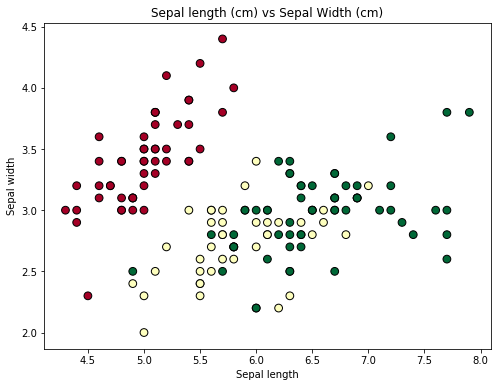

In [6]:
# plotting some graphs to show the relationship between flowering dataset using matplotlib

# Relationship between Sepal length and Sepal width for the 3 classes of flowers

plt.figure(1, figsize=(8, 6))
plt.clf()

plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap=plt.cm.RdYlGn, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal length (cm) vs Sepal Width (cm)')

plt.show()

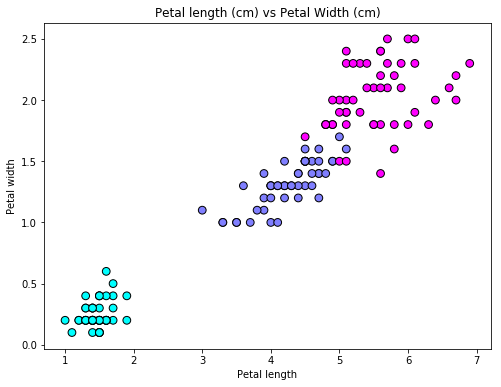

In [7]:

# Relationship between Petal length and Petal width for the 3 classes of flowers
plt.figure(1, figsize=(8, 6))
plt.scatter(X[:,2], X[:,3], c=y, s=60, cmap=plt.cm.cool, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal length (cm) vs Petal Width (cm)')

plt.show()

**Observation:**

_The Petal length and width seems to be less distored and clearly classified than the Sepal Length and width plot._

In [8]:
# Splitting the Iris dataset into Train and Test data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('The length of Training data set',len(X_train))
print('The length of Test data set',len(X_test))


The length of Training data set 120
The length of Test data set 30


## Using Classification algorithms to train our Iris data set.
### 1.  K Nearest Neighbor Classifier

In [34]:
# Training the train data set using KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
n_neighbors=10
knn_clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [35]:
# Calculating the score

print('Algorithm Score (KNN): {:.2f}'.format(knn_clf.score(X_test,y_test) * 100))


Algorithm Score (KNN): 100.00


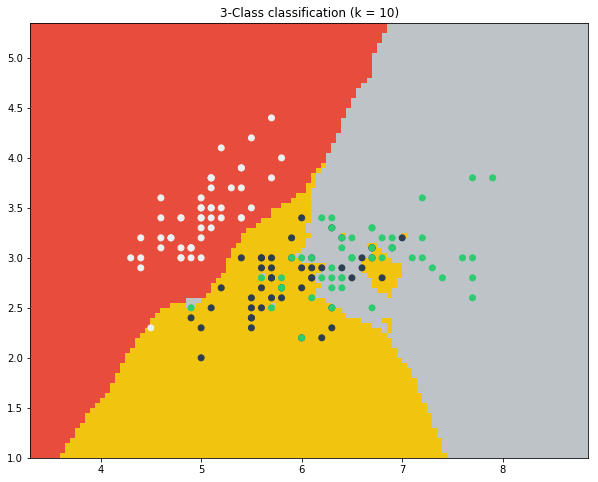

In [25]:
# Plotting a 2D image based on 2 features of the Iris dataset - Sepal Length and Sepal Width

from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#e74c3c', '#f1c40f','#bdc3c7'])
cmap_bold = ListedColormap(['#ecf0f1', '#2c3e50','#2ecc71'])

h=.05 # step size in the mesh

# Fitting only the Sepal Length and width data set to the KNN Classifier for plotting
knn_clf2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn_clf2.fit(X_train[:,:2], y_train)

# calculate min, max and limits for creating the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
# predict class using data and kNN classifier
Z = knn_clf2.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()

In [26]:
# Making Sample Prediction based on manual data entry
manual_dataentry=knn_clf.predict([[1.5,1.0,0.7,1.0]])
print('Sample Prediction :'), 
if manual_dataentry == 0:
    print('Iris Setosa')
elif manual_dataentry == 1:
    print('Iris Versicolour')
else:
    print('Iris Virginica')

Sample Prediction :
Iris Setosa


In [27]:
# printing all of the test data set predictions
len_test_data=len(y_test)

for i in range(0,len_test_data):
    test_predict=knn_clf.predict(X_test[[i]])
    if test_predict == 0:
        variety='Setosa'
    elif test_predict == 1:
        variety='Versicolour'
    else:
        variety='Virginica'
    print(X_test[[i]],test_predict,variety)
 


[[ 6.1  3.   4.6  1.4]] [1] Versicolour
[[ 6.4  2.9  4.3  1.3]] [1] Versicolour
[[ 6.5  2.8  4.6  1.5]] [1] Versicolour
[[ 6.   2.9  4.5  1.5]] [1] Versicolour
[[ 5.4  3.4  1.5  0.4]] [0] Setosa
[[ 6.4  3.2  5.3  2.3]] [2] Virginica
[[ 6.1  2.8  4.   1.3]] [1] Versicolour
[[ 5.8  2.8  5.1  2.4]] [2] Virginica
[[ 6.1  2.6  5.6  1.4]] [2] Virginica
[[ 6.6  3.   4.4  1.4]] [1] Versicolour
[[ 6.4  2.8  5.6  2.2]] [2] Virginica
[[ 5.5  2.6  4.4  1.2]] [1] Versicolour
[[ 4.4  3.   1.3  0.2]] [0] Setosa
[[ 5.4  3.4  1.7  0.2]] [0] Setosa
[[ 4.5  2.3  1.3  0.3]] [0] Setosa
[[ 7.1  3.   5.9  2.1]] [2] Virginica
[[ 5.6  2.7  4.2  1.3]] [1] Versicolour
[[ 6.8  3.   5.5  2.1]] [2] Virginica
[[ 5.2  3.5  1.5  0.2]] [0] Setosa
[[ 7.7  3.8  6.7  2.2]] [2] Virginica
[[ 6.4  2.8  5.6  2.1]] [2] Virginica
[[ 6.   2.2  5.   1.5]] [2] Virginica
[[ 5.5  4.2  1.4  0.2]] [0] Setosa
[[ 4.6  3.6  1.   0.2]] [0] Setosa
[[ 5.5  2.5  4.   1.3]] [1] Versicolour
[[ 6.5  3.   5.5  1.8]] [2] Virginica
[[ 7.7  2.6  6.

### 2.  Logistic Regression

In [28]:
# Training the data set using Logistic regression

from sklearn.linear_model import LogisticRegression
logistic_reg= LogisticRegression()

logistic_reg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
print('Algorithm Score (Logistic Regression): {:.2f}'.format(logistic_reg.score(X_test, y_test) * 100))

Algorithm Score (Logistic Regression): 100.00


# Algorithm Score Chart

1. K Nearest Neighbor Classifier : 100.00 %
2. Logistic Regression           : 96.67  % 